In [50]:
from google.colab import files
uploaded = files.upload()

Saving vgsales_asli.csv to vgsales_asli.csv


In [77]:
# Import library yang diperlukan
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [78]:
data = pd.read_csv('vgsales_asli.csv')
data.columns = data.columns.str.strip()

In [79]:
data.dropna(inplace=True)


In [80]:

# 2. Label Encoding untuk kolom kategorikal
le_genre = LabelEncoder()
le_publisher = LabelEncoder()

data['Genre'] = le_genre.fit_transform(data['Genre'])
data['Publisher'] = le_publisher.fit_transform(data['Publisher'])

In [81]:
X = data[['Genre', 'Publisher']]  # fitur
y = data['Global_Sales']          # target

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [83]:
# 6. Inisialisasi dan latih model regresi
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [84]:
# 7. Prediksi dan evaluasi
y_pred = model.predict(X_test)

In [85]:
# 8. Evaluasi hasil
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 3.595391053884572
R2 Score: 0.08991550566992945


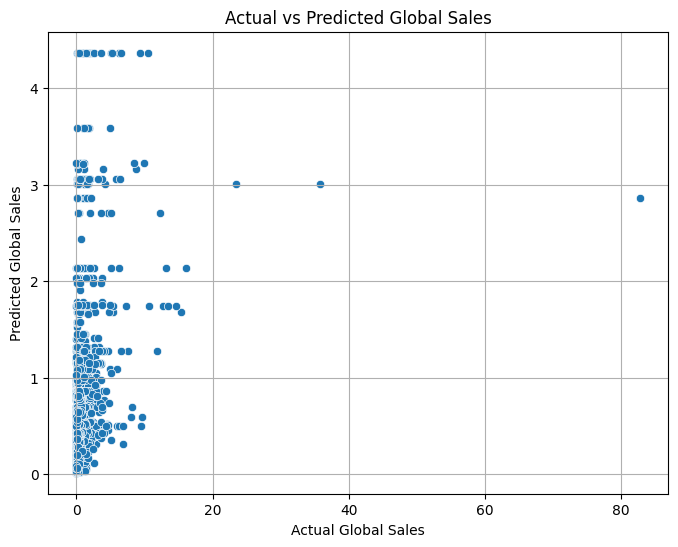

In [86]:
# ----------------------------
# 8. Grafik Prediksi vs Aktual
# ----------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")
plt.title("Actual vs Predicted Global Sales")
plt.grid(True)
plt.show()

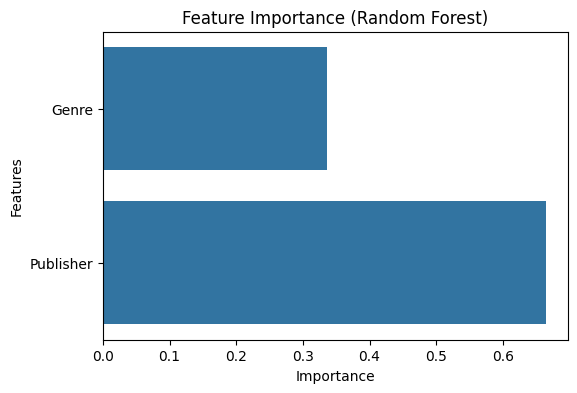

In [87]:
importances = model.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


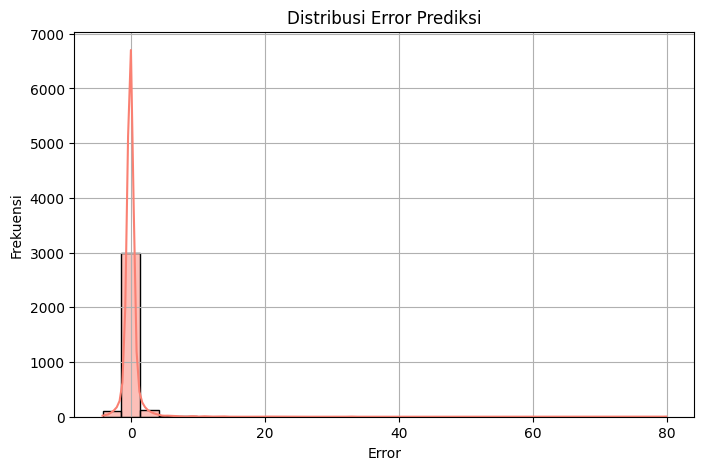

In [88]:
# ----------------------------
# 10. Grafik Distribusi Error
# ----------------------------
errors = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(errors, bins=30, kde=True, color='salmon')
plt.title("Distribusi Error Prediksi")
plt.xlabel("Error")
plt.ylabel("Frekuensi")
plt.grid(True)
plt.show()